# ${}^{4}{\rm He}$

The interaction is defined in `helium4.py`. It is nonlocal, and so is the counterterm. We will use it to tune the scattering length over a range of short-distance cutoffs, $R$.

In [1]:
import numpy as np
from scipy import optimize

import mu2

import helium4plusplus as he4

In [2]:
ELL = 0
R_MAX = he4.BETA6/2
R_MIN = he4.BETA6/8
N1 = 2
N2 = 6
NCT = 6

nR = 50
Rs = 2/np.linspace(2/R_MAX, 2/R_MIN, nR)

gs = np.empty(nR)
b2s = np.empty(nR)
r0s = np.empty(nR)

In [3]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 30)
X = he4.FACTOR * he4.BETA6 # K•Å^3

def inverse_a0_diff(g, sys):
    a0, _ = sys.a0_and_r0(g, 0, momenta, use_c=True)
    return (1/he4.A0 - 1/a0)*he4.A0

In [4]:
s = he4.SemiLocalHelium4System(Rs[0], ELL, N1, N2, NCT)

In [5]:
guess = -0.0239*X
s.a0_and_r0(guess, 0, momenta, use_c=True), s.bound_state_spectrum(guess, 0)

((99.68907275787302, 6.246327500503588), array([-0.00130257]))

In [6]:
for i in range(nR):
    R = Rs[i]
    s = he4.SemiLocalHelium4System(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4e}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0]):.4e}')
        guess = g
    else:
        break

i = 0  R = 2.7706e+00  g = -2.3844e-02 X  a0 = 1.0000e+02  r0 = 6.2475e+00  b2 = 1.2942e-03
i = 1  R = 2.6108e+00  g = 6.4257e-02 X  a0 = 1.0000e+02  r0 = 6.5812e+00  b2 = 1.2993e-03
i = 2  R = 2.4684e+00  g = 1.6988e-01 X  a0 = 1.0000e+02  r0 = 6.8815e+00  b2 = 1.3039e-03
i = 3  R = 2.3407e+00  g = 3.0333e-01 X  a0 = 1.0000e+02  r0 = 7.1341e+00  b2 = 1.3078e-03
i = 4  R = 2.2256e+00  g = 4.8460e-01 X  a0 = 1.0000e+02  r0 = 7.3298e+00  b2 = 1.3109e-03
i = 5  R = 2.1213e+00  g = 7.5965e-01 X  a0 = 1.0000e+02  r0 = 7.4648e+00  b2 = 1.3130e-03
i = 6  R = 2.0263e+00  g = 1.2652e+00 X  a0 = 1.0000e+02  r0 = 7.5403e+00  b2 = 1.3142e-03
i = 7  R = 1.9394e+00  g = 2.6818e+00 X  a0 = 1.0000e+02  r0 = 7.5621e+00  b2 = 1.3146e-03
i = 8  R = 1.8597e+00  g = 1.8049e+03 X  a0 = 1.0000e+02  r0 = 7.5384e+00  b2 = 1.3142e-03


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [7]:
restart = 9
s = he4.SemiLocalHelium4System(Rs[restart], ELL, N1, N2, NCT)

In [38]:
guess = -2.65*X
inverse_a0_diff(guess, s)

-0.0021276353801129647

In [39]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.SemiLocalHelium4System(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0]):.4e}')
        guess = g
    else:
        break

i = 9  R = 1.7863  g = -2.6489e+00 X  a0 = 1.0000e+02  r0 = 7.4791e+00  b2 = 1.3132e-03
i = 10  R = 1.7185  g = -1.2090e+00 X  a0 = 1.0000e+02  r0 = 7.3940e+00  b2 = 1.3119e-03
i = 11  R = 1.6556  g = -6.7315e-01 X  a0 = 1.0000e+02  r0 = 7.2916e+00  b2 = 1.3103e-03
i = 12  R = 1.5972  g = -3.5553e-01 X  a0 = 1.0000e+02  r0 = 7.1777e+00  b2 = 1.3085e-03
i = 13  R = 1.5427  g = -1.1722e-01 X  a0 = 1.0000e+02  r0 = 7.0541e+00  b2 = 1.3066e-03
i = 14  R = 1.4919  g = 9.0391e-02 X  a0 = 1.0000e+02  r0 = 6.9165e+00  b2 = 1.3044e-03
i = 15  R = 1.4443  g = 2.9125e-01 X  a0 = 1.0000e+02  r0 = 6.7494e+00  b2 = 1.3019e-03
i = 16  R = 1.3996  g = 5.0191e-01 X  a0 = 1.0000e+02  r0 = 6.5127e+00  b2 = 1.2982e-03
i = 17  R = 1.3576  g = 7.3883e-01 X  a0 = 1.0000e+02  r0 = 6.0934e+00  b2 = 1.2918e-03
i = 18  R = 1.3181  g = 1.0249e+00 X  a0 = 1.0000e+02  r0 = 5.0686e+00  b2 = 1.2766e-03
i = 19  R = 1.2808  g = 1.4021e+00 X  a0 = 1.0000e+02  r0 = 2.9630e-01  b2 = 1.2113e-03


In [40]:
restart = 20
s = he4.SemiLocalHelium4System(Rs[restart], ELL, N1, N2, NCT)

In [50]:
s.kcotd_gen_fast(momenta, 0, 0)

array([  17.30454231,   17.45543622,   17.71250012,   18.08399326,
         18.58281582,   19.22737744,   20.0436108 ,   21.06787295,
         22.35168816,   23.96954851,   26.03221802,   28.71089285,
         32.28362615,   37.23291813,   44.47409042,   55.9785829 ,
         76.91110072,  126.48298078,  387.09924544, -337.84412581,
       -114.71848671,  -68.11331161,  -47.9688983 ,  -36.75534059,
        -29.62480685,  -24.69970115,  -21.10006573,  -18.35868565,
        -16.20455774,  -14.46970707])

In [49]:
guess = -100*X
inverse_a0_diff(guess, s)

2985.1636084259985

In [55]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.SemiLocalHelium4System(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0])}')
        guess = g
    else:
        break

i = 28  R = 1.0208  g = 2.7096e+00 X  a0 = 1.0000e+02  r0 = 7.4380e+00  b2 = 0.0013125864991519426
i = 29  R = 0.9982  g = 3.3891e+00 X  a0 = 1.0000e+02  r0 = 7.4320e+00  b2 = 0.0013124911141916182
i = 30  R = 0.9767  g = 4.4403e+00 X  a0 = 1.0000e+02  r0 = 7.4240e+00  b2 = 0.0013123643732332014
i = 31  R = 0.9561  g = 6.3851e+00 X  a0 = 1.0000e+02  r0 = 7.4146e+00  b2 = 0.0013122173390277736
i = 32  R = 0.9363  g = 1.1614e+01 X  a0 = 1.0000e+02  r0 = 7.4047e+00  b2 = 0.001312060593062537
i = 33  R = 0.9173  g = 1.0494e+02 X  a0 = 1.0000e+02  r0 = 7.3948e+00  b2 = 0.0013119037336370742


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [57]:
restart = 34
s = he4.SemiLocalHelium4System(Rs[restart], ELL, N1, N2, NCT)

In [72]:
guess = -12.6*X
inverse_a0_diff(guess, s)

-0.0010588444540410302

In [73]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.SemiLocalHelium4System(R, ELL, N1, N2, NCT)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0])}')
        guess = g
    else:
        break

i = 34  R = 0.8991  g = -1.2596e+01 X  a0 = 1.0000e+02  r0 = 7.3853e+00  b2 = 0.001311754910212761
i = 35  R = 0.8816  g = -5.2146e+00 X  a0 = 1.0000e+02  r0 = 7.3768e+00  b2 = 0.0013116205840834278
i = 36  R = 0.8647  g = -2.8520e+00 X  a0 = 1.0000e+02  r0 = 7.3695e+00  b2 = 0.0013115054280846711
i = 37  R = 0.8485  g = -1.6263e+00 X  a0 = 1.0000e+02  r0 = 7.3636e+00  b2 = 0.0013114123392142312
i = 38  R = 0.8329  g = -8.3450e-01 X  a0 = 1.0000e+02  r0 = 7.3591e+00  b2 = 0.0013113425554555417
i = 39  R = 0.8178  g = -2.5098e-01 X  a0 = 1.0000e+02  r0 = 7.3562e+00  b2 = 0.001311295841047208
i = 40  R = 0.8033  g = 2.1918e-01 X  a0 = 1.0000e+02  r0 = 7.3546e+00  b2 = 0.0013112707211646072
i = 41  R = 0.7893  g = 6.2320e-01 X  a0 = 1.0000e+02  r0 = 7.3542e+00  b2 = 0.0013112647391085772
i = 42  R = 0.7758  g = 9.8758e-01 X  a0 = 1.0000e+02  r0 = 7.3548e+00  b2 = 0.0013112747421598152
i = 43  R = 0.7627  g = 1.3286e+00 X  a0 = 1.0000e+02  r0 = 7.3563e+00  b2 = 0.0013112971385969988
i = 44

In [74]:
import matplotlib.pyplot as plt

plt.style.use('science')
gr = 4/3
h = 3

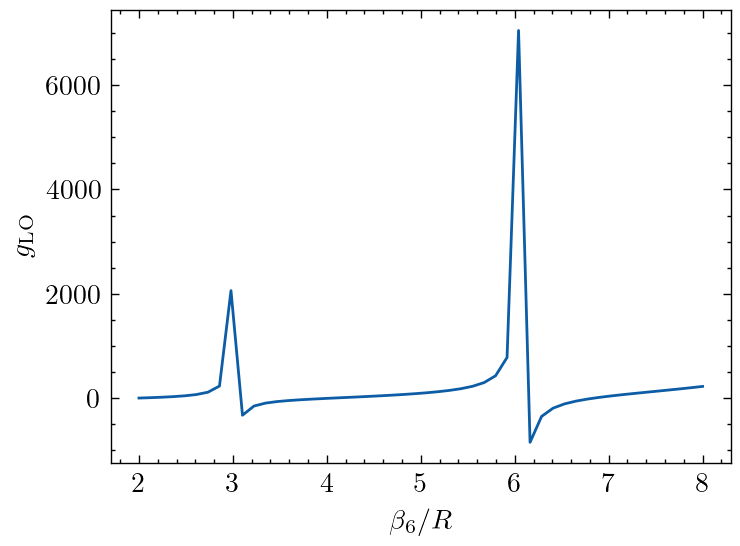

In [75]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, gs)

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$g_{\rm LO}$');

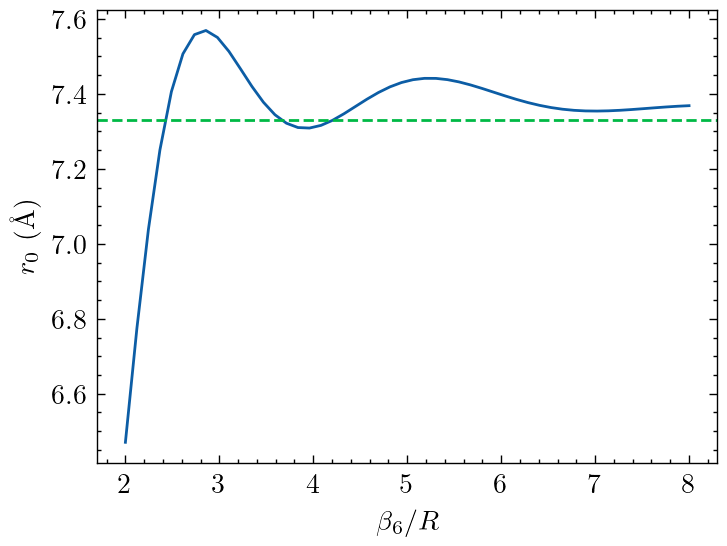

In [76]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, r0s)
ax.axhline(he4.R0, color='C1', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

In [77]:
filename_id = f'he4plusplus_LO_semilocal_{N1}_{N2}_{NCT}'

In [78]:
np.savetxt('datfiles/'+filename_id + '_rg_flow.txt', np.vstack((Rs, gs)).T, header='R (Å)  g ()')

In [79]:
np.savetxt('datfiles/' + filename_id + '_r0s.txt', np.vstack((Rs, r0s)).T, header='R (Å)  r_0 (Å)')